# Tarea 6: Integración con Taylor

Fecha de envío del PR inicial: **viernes 5 de mayo**

Fecha de aceptación del PR: **martes 16 de mayo, antes de la clase**

---

## Ejercicio 1

Usando su implementación de polinomios de Taylor, escriban un integrador para la ecuación diferencial que se desarrolló en este ejemplo, esto es, $\dot{x} = x^2$ con la condición inicial $x(0) = 3$. 

El integrador debe hacer las operaciones necesarias para obtener automáticamente los coeficientes $x_{[k]}$, *en cada paso de integración*, a partir de la condición inicial local. Un requisito básico para esto es que tengan una implementación de la función $P_\alpha(x) = [g(x)]^\alpha$ con $g(x)$ un polinomio de Taylor, que hicieron en la "Tarea5", y que funcione bien en particular para `alpha::Int`.

La implementación debe consistir de varias funciones: 

- Una función donde se calculen los coeficientes $x_{[k]}$ de la expansión. Esta función deberá llamar a otra donde se implementan las recurrencias que imponen las ecuaciones de movimiento.

- Una función donde se obtenga el paso de integración $h$ como se describió en el notebook 10.

- Otra función donde se haga la suma usando el método de Horner.

- Finalmente, una función que combine las funciones anteriores para hacer la integración desde un tiempo inicial a uno final. En este punto, *fingiremos ignorancia*, en el sentido de  que el tiempo inicial es cero, y el tiempo final será $0.5$ (que está más allá de donde la solución está definida).


Dado que conocemos la solución analítica de este problema, grafiquen como función de $t$ el error relativo de su integrador (respecto al valor del resultado analítico).

---

## Ejercicio 2

Repitan la integración del ejercicio anterior usando el método de Runge-Kutta de 4o orden con paso de integración fijo (que es lo más sofisticado que conocen hasta ahora) y comparen los resultados del error relativo con los obtenidos con el método de Taylor. En particular, finjan ignorancia de la misma manera que en el ejercicio anterior.

In [40]:
"""
se hará el método de runge-kutta para resolver una ecuación diferencial de la forma dx/dt=f(x,t),
considerando el valor de una condicion inicial en t_0, con cierto número de pasos, y cierto valor en x_0
"""
function runge_kutta_4(f,t_0,x_0,n)
    t_f=0.1
    t=zeros(n+1) #"t"
    x=zeros(n+1)   #"x"
    g=zeros(n+1)#la funcion evaluada en t y x
    h=(t_f-t_0)/n
    t[1]=t_0
    x[1]=x_0
    for i in 1:n
        k_1=f(t[i],x[i])     #condiciones necesarias para definir el siguiente valor de "t" y de "x"
        k_2=f(t[i]+(h*(1/2)),x[i]+((1/2)*((k_1)*h)))
        k_3=f(t[i]+(h*(1/2)),x[i]+((1/2)*((k_2)*h)))
        k_4=f(t[i]+h,x[i]+((k_3)*h))
        x[i+1]=x[i]+(1/6)*(h)*(k_1+2*k_2+2*k_3+k_4)
        t[i+1]=t[i]+h
        g[i+1]=f(t[i],x[i])
        
    end
    return t,g
end

runge_kutta_4

In [41]:
f(t,x)=x^2

f (generic function with 1 method)

, Any) in module Main at In[37]:1 overwritten at In[41]:1.


In [42]:
(t,x)=runge_kutta_4(f,0,3,1000000)

([0.0,1.0e-7,2.0e-7,3.0e-7,4.0e-7,5.0e-7,6.0e-7,7.0e-7,8.0e-7,9.0e-7  …  0.0999991,0.0999992,0.0999993,0.0999994,0.0999995,0.0999996,0.0999997,0.0999998,0.0999999,0.1],[0.0,9.0,9.00001,9.00001,9.00002,9.00002,9.00003,9.00003,9.00004,9.00004  …  18.3672,18.3672,18.3672,18.3672,18.3673,18.3673,18.3673,18.3673,18.3673,18.3673])

In [43]:
typeof(ans)

Tuple{Array{Float64,1},Array{Float64,1}}

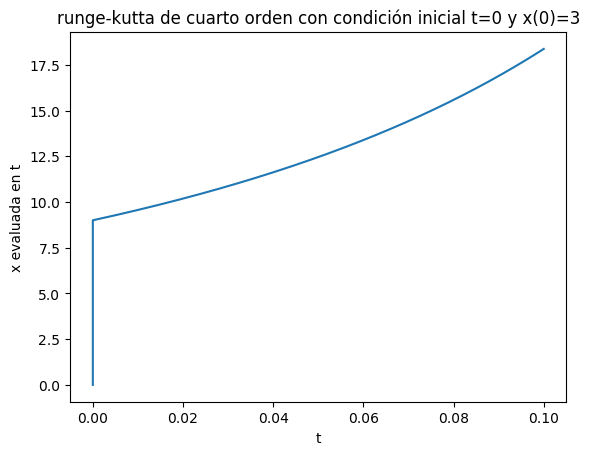

In [44]:
using PyPlot
plot(t,x)
title("runge-kutta de cuarto orden con condición inicial t=0 y x(0)=3")
xlabel("t")
ylabel("x evaluada en t")
show()

---

## Ejercicio 3

Integra la ecuación de movimiento para el oscilador armónico, $\ddot{x} = -2x$, con $x(0)=2$, $\dot{x}(0)=0$, durante 10^4 periodos de oscilación (o sea, hasta $t_f = 10^4 \cdot 2\pi/\sqrt{2}$, usando el método de Taylor y el método de Runge-Kutta de 4o orden con paso de integración constante. Compara cómo cambia la energía (respecto al valor al tiempo cero) en función del tiempo en ambos métodos.

In [46]:
function runge_kutta_4_2(f,t_0,x_0,y_0,n)   #se aumenta un elemento más en la función de runge kutta, pero en principio es lo mismo
    t_f=(10e4*2*pi)/(sqrt(2))
    h=((t_f)-(t_0))/n
    t=zeros(n+1)
    x=zeros(n+1)
    y=zeros(n+1)
    t[1]=t_0
    x[1]=x_0
    y[1]=y_0
    k(t,x,y)=y
    g(t,x,y)=f(t,x)
    for i in 1:n
        k_1=g(t[i],x[i],y[i])    #las condiciones para definir "x", "y" y "yprima"
        m_1=k(t[i],x[i],y[i])
        k_2=g(t[i]+((1/2)*h),x[i]+((k_1)*(1/2)*h),y[i]+((m_1)*(1/2)*h))
        m_2=k(t[i]+((1/2)*h),x[i]+((k_1)*(1/2)*h),y[i]+((m_1)*(1/2)*h))
        k_3=g(t[i]+((1/2)*h),x[i]+((k_2)*(1/2)*h),y[i]+((m_2)*(1/2)*h))
        m_3=k(t[i]+((1/2)*h),x[i]+((k_2)*(1/2)*h),y[i]+((m_2)*(1/2)*h))
        k_4=g(t[i]+h,x[i]+((k_3)*h),y[i]+((m_3)*h)) 
        m_4=k(t[i]+h,x[i]+((k_3)*h),y[i]+((m_3)*h))
        t[i+1]=t[i]+h
        x[i+1]=x[i]+(1/6)*(k_1+k_2+k_3+k_4)*h
        y[i+1]=y[i]+(1/6)*(m_1+m_2+m_3+m_4)*h
    end
    return t,x
end

runge_kutta_4_2 (generic function with 1 method)

In [47]:
g(x,t)=-2x

g (generic function with 1 method)

In [51]:
(t,x)=runge_kutta_4_2(g,0,2,0,100000)

([0.0,4.44288,8.88577,13.3286,17.7715,22.2144,26.6573,31.1002,35.5431,39.9859  …  4.44248e5,4.44253e5,4.44257e5,4.44262e5,4.44266e5,4.44271e5,444275.0,4.44279e5,4.44284e5,4.44288e5],[2.0,-11.1595,-50.6379,-116.435,-208.552,-326.987,-471.741,-642.814,-840.206,-1063.92  …  -1.31571e11,-1.31574e11,-1.31576e11,-1.31579e11,-1.31582e11,-1.31584e11,-1.31587e11,-1.31589e11,-1.31592e11,-1.31595e11])

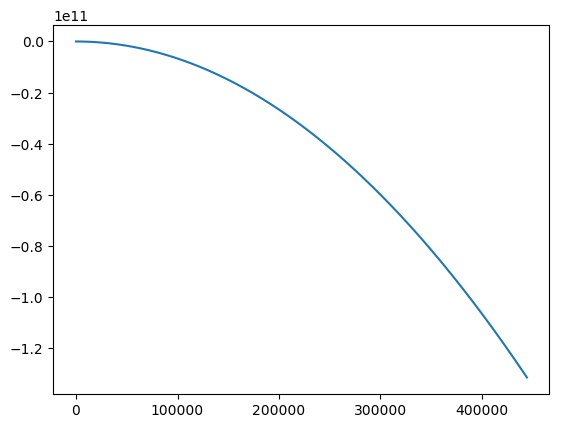

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x000000002ECB10F0>

In [52]:
plot(t,x)